## Исследование данных о российском кинопрокате



Изучим рынок российского кинопроката и выявим текущие тренды.

В нашем распоряжении два файла:  
- данные о прокатных удоставерениях - [ссылка](https://drive.google.com/file/d/1emHv7W44ZvaszKi7yJBJl7FXII29yevn/view?usp=sharing)
- данные о прокате в российских кинотеатрах - [ссылка](https://drive.google.com/file/d/19LhyxDYu2quB6xG4qrw2mObh1K5D7-IE/view?usp=sharing).  

Эти данные мы объедими в одну таблицу и проверим их качество - наличие пропусков, дубликатов, аномалий.

**Цели исследования:**
- Рассмотреть фильмы, которые получили государственную поддержку - их экономические показатели и насколько они интересны зрителю?
- Изучить годовую динамику изменения количества фильмов в прокате.
- Изучить годовую динамику изменения кассовых сборов.
- Рассмотреть влияние возрастных ограничений на кассовые сборы фильмов.
- Определить, есть ли еще какие-то закономерности и взаимосвязи.

### Откроем файлы с данными и объединим их в один датафрейм.



In [21]:
! gdown --id 1emHv7W44ZvaszKi7yJBJl7FXII29yevn

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1emHv7W44ZvaszKi7yJBJl7FXII29yevn
To: /content/mkrf_movies.csv
100% 3.02M/3.02M [00:00<00:00, 21.4MB/s]


In [22]:
! gdown --id 19LhyxDYu2quB6xG4qrw2mObh1K5D7-IE

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=19LhyxDYu2quB6xG4qrw2mObh1K5D7-IE
To: /content/mkrf_shows.csv
100% 62.6k/62.6k [00:00<00:00, 4.16MB/s]


In [153]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore')

In [24]:
data1 = pd.read_csv('/content/mkrf_movies.csv')
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [25]:
data2 = pd.read_csv('/content/mkrf_shows.csv')
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


Таблицы можно объединить по общей колонке `puNumber`.  
Сначала изменим тип данных этой колонке в первой таблице на `int`
.

In [26]:
data1['puNumber'] = pd.to_numeric(data1['puNumber'], errors='coerce').fillna(0)
data1['puNumber'] = data1['puNumber'].astype(int)

In [27]:
data = pd.merge(data1, data2, on='puNumber', how='left')

### Предобработка данных

#### Проверим типы данных

Проверим типы данных в датафрейме и преобразем их там, где это необходимо.

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [29]:
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


Видим, что в полученном датафрейме 7486 строк и 16 колонок.

Изменим типы данных в колонках `show_start_date` и `ratings`.

А также приведем название колонки `puNumber` в надлежащий вид.

In [30]:
data['show_start_date'] = pd.to_datetime(data['show_start_date'])
data['ratings'] = pd.to_numeric(data['ratings'], errors='coerce')
data = data.rename(columns = {'puNumber': 'pu_number'})
print(data['show_start_date'].head())

0   2015-11-27 12:00:00+00:00
1   2016-09-13 12:00:00+00:00
2   2016-10-10 12:00:00+00:00
3   2016-06-10 12:00:00+00:00
4   2015-07-29 12:00:00+00:00
Name: show_start_date, dtype: datetime64[ns, UTC]


#### Изучим пропуски в датафрейме.

Посмотрим на общее количество пропусков в колонках.

In [31]:
data.isna().sum()

title                       0
pu_number                   0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   996
genres                    976
box_office               4328
dtype: int64

Просмотрим на доли (в процентах) пропущенных значений по столбцам.

In [32]:
round(data.isna().sum() / data.shape[0] * 100, 2)

title                     0.00
pu_number                 0.00
show_start_date           0.00
type                      0.00
film_studio               0.24
production_country        0.03
director                  0.12
producer                  7.59
age_restriction           0.00
refundable_support       95.57
nonrefundable_support    95.57
budget                   95.57
financing_source         95.57
ratings                  13.30
genres                   13.04
box_office               57.81
dtype: float64

Мы видим, что в четырех колонках отсуствует 95% данных!

In [33]:
print('Суммарное количество пропусков:', data.isna().sum().sum())

Суммарное количество пропусков: 35513


Рассмотрим пропуски в колонках детальнее.  
В 11 из 18 колонок есть пропущенные значения.

В колонке **`production_country`** всего два пропуска. Посмотрим на эти строки.

In [34]:
data[data['production_country'].isna()][['title', 'genres', 'film_studio', 'director']]

,title,genres,film_studio,director
3186,"Детский юмористический киножурнал ""Ералаш. Ну ...","детский,комедия","ООО ""Продюсерский центр ЕРАЛАШ""","Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А..."
4441,Мульт личности. Выпуск 5,"мультфильм,комедия",NaN,NaN


Оченидно, оба фильма - российские. Заполним пропуски.

In [35]:
data['production_country'] = data['production_country'].fillna('Россия')

Для колонок **`film_studio`**, **`director`**, **`producer`**, **`ratings`** и **`genres`** попробуем применить такой способ - мы видим, что в нашем датафрейме есть строки с одинаковыми фильмами. Предположим, что есть строки с одинаковми названиями фильмов, но с разным заполнением других колонок. Можем создать один датафрейм, в котором собраны отсутствующие значения в указанных выше колонках, а во втором - все остальные. Затем найдем пересечения двух датафреймов (how = 'inner'). Если есть персечения - у нас будет, чем заполнить пропуски в пересекающихся строках.

In [36]:
df1 = data[['title', 'producer']].sort_values(by='producer').tail(568)
df2 = data[['title', 'producer']].sort_values(by='producer').head(6918)
df = pd.merge(df1, df2, on = 'title', how = 'inner')
df

,title,producer_x,producer_y
0,Валентина,NaN,"С.Медведева, Ю.Медведева, М.Стрелкова, В.Черкашин"
1,Прощание,NaN,А.Киселев
2,Прощание,NaN,"Анита Го, Даниэль Тейт Мелиа, Эндрю Миано"
3,Прощание,NaN,В.Найговзина
4,Успех,NaN,В.Сунцов
5,Успех,NaN,"С.Бобза, Г.Малков, В.Поляков, М.Кучмент"
6,Ложные признания,NaN,"Рейнхарт Бетц, Пол Видерхольд, Катрин Шальстрём"
7,Вторжение,NaN,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский"


Идея сработала только для нескольких фильмов с продюссерами. Рассмотрим эти фильмы внимательнее.

In [37]:
display(data.query('title == "Валентина"'))
display(data.query('title == "Прощание"'))
display(data.query('title == "Ложные признания"'))
display(data.query('title == "Вторжение"'))


,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
86,Валентина,111012713,2013-12-19 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Г.Панфилов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.5,драма,NaN
6899,Валентина,112003919,2019-05-03 12:00:00+00:00,Документальный,"ООО Кинокомпания ""Мастерская""",Россия,Д.Былинушкина,"С.Медведева, Ю.Медведева, М.Стрелкова, В.Черкашин",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.5,драма,NaN


,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
266,Прощание,111029414,2014-12-24 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Э.Климов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.2,драма,NaN
5514,Прощание,211037617,2017-09-07 12:00:00+00:00,Художественный,Всероссийский государственный институт кинемат...,Россия,А.Петровская,В.Найговзина,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.2,драма,NaN
6909,Прощание,111007519,2019-05-01 12:00:00+00:00,Художественный,ИП Киселев Алексей Евгеньевич,Россия,М.Фомина,А.Киселев,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.2,драма,NaN
7281,Прощание,121028719,2019-10-07 12:00:00+00:00,Художественный,"Биг Бич Филмз, Депз оф Филд, Киндред Спирит",США,Лулу Ванг,"Анита Го, Даниэль Тейт Мелиа, Эндрю Миано",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.2,драма,2617932.5


,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3268,Ложные признания,121034216,2016-12-21 12:00:00+00:00,Художественный,"Арт Франс, Идеаль Аудиенс, Маха Продюксьон, Од...",Франция,Люк Бонди,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.4,"драма,комедия",1242819.0
6870,Ложные признания,126001119,2019-04-26 12:00:00+00:00,Прочие,Гуд Компани Пикчерз,Дания - США,Катрин Филип,"Рейнхарт Бетц, Пол Видерхольд, Катрин Шальстрём",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,5.4,"драма,комедия",NaN


,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5430,Вторжение,124002417,2017-08-01 12:00:00+00:00,Анимационный,Баобаб Студиос,США,Эрик Дарнелл,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,5.7,"фантастика,боевик",NaN
7474,Вторжение,111022519,2019-12-23 12:00:00+00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000000.0,400000000.0,944000000.0,Фонд кино,5.7,"фантастика,боевик",NaN


Как оказалось, это разные фильмы с одинаковым названием. Заполнить пропуски таким образом мы не сможем.

Рассмотрим строки с пропусками внимательнее.

**`film_studio`**, **`director`** и **`producer`**

In [38]:
data[data['film_studio'].isna()][['title', 'genres', 'film_studio', 'director']]

,title,genres,film_studio,director
1293,Stars in Shorts,комедия,NaN,"Роберт Фестингер, Руперт Френд, Джей Камен, Ни..."
4441,Мульт личности. Выпуск 5,"мультфильм,комедия",NaN,NaN
6105,Значит любит,NaN,NaN,А.Краевский
6181,Несейка. Младшая дочь,NaN,NaN,В.Марин
6379,Ян Антонышев,NaN,NaN,Е.Окопная
6380,Ян Антонышев,NaN,NaN,Е.Окопная
6399,Доживем до каникул?..,NaN,NaN,Я.Хальпукова (псевдоним Яна Мартынец)
6485,До и После,"драма,криминал,детектив",NaN,А.Новокреповская
6494,Калмыцкий геше Нгаванг Вангьял,NaN,NaN,И.Долгина
6497,Мой папа Чингисхан,NaN,NaN,А.Сайфуллина


In [39]:
data[data['director'].isna()][['title', 'genres', 'film_studio', 'director']]

,title,genres,film_studio,director
764,"Три звезды. Концерт в Waldbuhne Theater, Берли...",NaN,Райзинг Алтернатив,NaN
1735,Помпеи. Британский музей,NaN,"МортуСкрин, Британский музей",NaN
3840,Зур концерт (Большой концерт).,NaN,"ООО ""Барс Рекордс""",NaN
4052,"Ганс Сэйфуллин ""Авылым чишмэлэре. Ганс Сэйфулл...",NaN,"ООО ""Барс-Рекордс""",NaN
4298,Изге Вэли (Святой Валентин),NaN,"ООО ""Барс Рекордс""",NaN
4415,Bon Jovi. The Circle Tour,"концерт,музыка",Эншутц Интертейнмент Груп,NaN
4441,Мульт личности. Выпуск 5,"мультфильм,комедия",NaN,NaN
4923,Георг Фридрих Гендель. Мессия. Оратория. Корол...,NaN,Опус Арт,NaN
4942,Питер Гэбриэл и New Blood Orchestra 3D,"концерт,музыка",Омниверс Визион,NaN


In [40]:
data[data['producer'].isna()][['title', 'genres', 'film_studio', 'director']]

,title,genres,film_studio,director
1,Особо важное задание,"драма,военный","Киностудия ""Мосфильм""",Е.Матвеев
5,Остановился поезд,драма,"Киностудия ""Мосфильм""",В.Абдрашитов
6,Любовь и голуби,"мелодрама,комедия","Киностудия ""Мосфильм""",В.Меньшов
9,Отпуск за свой счет,"мелодрама,комедия","Киностудия ""Мосфильм"", Телевидение ВНР",В.Титов
11,Ответный ход,"боевик,драма,приключения","Киностудия ""Мосфильм""",М.Туманишвили
...,...,...,...,...
7405,Отряд специального назначения,"приключения,военный",Свердловская киностудия,Г.Кузнецов
7406,Назначаешься внучкой,военный,Свердловская киностудия,Я.Лапшин
7407,Перед рассветом,"драма,мелодрама",Свердловская киностудия,Я.Лапшин
7408,Ты помнишь,"драма,мелодрама,военный",Свердловская киностудия,О.Николаевский


Теоретически, можно было бы в интернете вручную найти студии, на которых снимались эти фильмы, кто их режиссировал и продюссировал, но это трудоемкий и нецелесообразный процесс. Оставим пропуски как есть.

**`ratings`** и **`genres`**

In [41]:
data[data['ratings'].isna()][['title', 'genres', 'film_studio', 'director']]

,title,genres,film_studio,director
43,Мемуары гейши (по роману Артура Голдена),NaN,"Коламбия Пикчерз Корпорейшн, ДримУоркс ЭсКейДж...",Роб Маршалл
150,Жди меня,NaN,"Киностудия ""Мосфильм""","А.Столпер, Б.Иванов"
154,Дом из песка и тумана (по книге Андре Дюбуи III),NaN,Кобальт Пикчерз,Вадим Перельман
159,Жемчужная девушка,NaN,"Чешское телевидение,Студия ""Три брата"" агентск...",Владимир Дрга
227,Полустанок,NaN,"Киностудия ""Мосфильм""",Б.Барнет
...,...,...,...,...
7479,Эколав,NaN,ВГИК,Д.Григорьев
7480,Акрам Хан: Родом из Карри Хауса,NaN,Свон Филмз,Ник Пойнц
7481,Сад художника: Американский импрессионизм,NaN,Севен Артс Продакшнз,Фил Грабски
7483,Щенячий патруль: Скорей спешим на помощь!,NaN,"Никелодеон Анимейшн Студиос, Спин Мастер",Чарльз Е.Бастьен


In [42]:
data[data['genres'].isna()][['title', 'genres', 'film_studio', 'director']]

,title,genres,film_studio,director
43,Мемуары гейши (по роману Артура Голдена),NaN,"Коламбия Пикчерз Корпорейшн, ДримУоркс ЭсКейДж...",Роб Маршалл
150,Жди меня,NaN,"Киностудия ""Мосфильм""","А.Столпер, Б.Иванов"
154,Дом из песка и тумана (по книге Андре Дюбуи III),NaN,Кобальт Пикчерз,Вадим Перельман
159,Жемчужная девушка,NaN,"Чешское телевидение,Студия ""Три брата"" агентск...",Владимир Дрга
227,Полустанок,NaN,"Киностудия ""Мосфильм""",Б.Барнет
...,...,...,...,...
7479,Эколав,NaN,ВГИК,Д.Григорьев
7480,Акрам Хан: Родом из Карри Хауса,NaN,Свон Филмз,Ник Пойнц
7481,Сад художника: Американский импрессионизм,NaN,Севен Артс Продакшнз,Фил Грабски
7483,Щенячий патруль: Скорей спешим на помощь!,NaN,"Никелодеон Анимейшн Студиос, Спин Мастер",Чарльз Е.Бастьен


Сиуаация с пропусками аналогичная - слишком длительный и нецелесообразный поиск вручную. Пока оставим все как есть.

**`refundable_support`**

Посмотрим на объём возвратных средств государственной поддержки. Для удобства восприятия, разделим все значения на 1000000 и округлим до сотых. Рассмотрим список уникальных значений.

In [43]:
data['refundable_support'] = round((data['refundable_support'] / 1000000), 2)
data['refundable_support'].sort_values().unique()

array([  0.  ,   3.5 ,   5.  ,   7.  ,   7.15,   7.35,   8.  ,   9.  ,
        10.  ,  15.  ,  17.  ,  19.  ,  20.  ,  25.  ,  26.  ,  28.  ,
        29.  ,  30.  ,  35.  ,  36.  ,  38.  ,  40.  ,  41.  ,  44.  ,
        50.  ,  55.  ,  60.  ,  75.  ,  80.  , 100.  , 110.  , 115.  ,
       150.  , 180.  ,    nan])

Видим, что у нас есть значения = 0, т.е., фильмы не получили возвратные средства государственной поддержки. Фильмы, которые поддерживало государство, получили средства от 2,5 до 190 млн руб.

Проверим, в каких странах снимались фильмы, не получившие возвратной гос. поддержки.

In [44]:
data.query('refundable_support == 0').value_counts('production_country')

production_country
Россия                                        207
Россия, Германия                                2
Россия, Италия                                  2
Россия - Грузия                                 1
Россия, Армения                                 1
Россия, Бельгия, Финляндия                      1
Россия, Германия, Казахстан, Польша, Китай      1
Россия, Латвия, Чешская Республика              1
Россия, Сербия                                  1
Россия, Украина, Польша                         1
Россия, Франция, Латвия                         1
Россия-Словакия-Чехия                           1
Россия-Украина                                  1
dtype: int64

Российиские, а также несколько фильмов, снятых совместно с другими странами. Все логично.

В каких странах снимались фильмы, получившие возвратную гос. поддержку?

In [45]:
data.query('refundable_support > 0').value_counts('production_country')

production_country
Россия                              109
Россия, Германия, Великобритания      1
Россия-Китай                          1
dtype: int64

Тоже Россия и пара совместных. Тоже все логично.

Страны производства фильмов с пропусками в этой колонке:

In [46]:
data[data['refundable_support'].isna()].value_counts('production_country').head(30)

production_country
США                     2172
Россия                  1507
СССР                     347
Франция                  301
Великобритания           257
Италия                   129
Германия                 110
США - Великобритания      88
Япония                    77
Испания                   74
Франция - Бельгия         55
Канада                    52
Австралия                 50
США - Канада              44
Великобритания - США      40
КНР                       33
Республика Кипр           31
США-Австралия             29
США - Франция             29
США - Германия            29
Южная Корея               25
Индия                     22
США - Австралия           22
СССР                      20
Норвегия                  19
США-Германия              19
Дания                     18
Швеция                    15
США-Великобритания        14
Ирландия                  14
dtype: int64

Предсказуемо иностранные, а также 1507 россйиских.

Взглянем на несколько этих фильмов:

In [47]:
data[data['refundable_support'].isna()].query('production_country == "Россия"').head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
336,Каникулы строгого режима,111008514,2014-08-07 12:00:00+00:00,Художественный,"ООО ""Кинобазза"" по заказу ЗАО ""Дирекция Кино""",Россия,И.Зайцев,"А.Максимов, Н.Попов, Д.Файзиев",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.1,"драма,комедия,приключения",360.0
462,Август. Восьмого,111000612,2012-02-07 12:00:00+00:00,Художественный,"ЗАО ""ПК ""ГЛАВКИНО""",Россия,Д.Файзиев,"Д.Файзиев, Ф.Бондарчук, И.Бачурин",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.1,"драма,военный",6775.0
463,Тот еще...!,111001612,2012-02-20 12:00:00+00:00,Художественный,"ООО ""Энджой мувиз""",Россия,С.Андреасян,Г.Малков,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,2.6,"фэнтези,комедия,семейный",12779.0
464,КОКОКО,111003112,2012-06-05 12:00:00+00:00,Художественный,"ООО Кинокомпания ""Глобус-фильм""",Россия,А.Смирнова,С.Сельянов,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.9,"драма,комедия",200.0
469,Разговор,111000712,2012-02-07 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КВФильм-Продакшн"", ООО ""Ком...",Россия,"В.Иванов, С.Комаров",В.Карев,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"триллер,драма,детектив",NaN
470,Сделка .,111000912,2012-02-08 12:00:00+00:00,Художественный,"ООО ""Студия Продюсерского Кино""",Россия,А.Силкин,"В.Зверев, М.Линьков",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.8,"ужасы,фэнтези,боевик",13350.0
471,Продавец игрушек,111001012,2012-02-08 12:00:00+00:00,Художественный,"ООО ""Национальное кино""",Россия,Ю.Васильев,В.Добросоцкий,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,5.9,"мелодрама,комедия",10310.0
472,901 километр,111001112,2012-02-08 12:00:00+00:00,Художественный,"ООО ""ВолгаКино""",Россия,Б.Куломзин,"А.Крутов, Л.Кашин",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,3.8,триллер,NaN
473,8 первых свиданий,111001212,2012-02-09 12:00:00+00:00,Художественный,"ООО ""Территория кино""",Россия,"Д.Додсон, А.Юрчиков","ООО ""Квартал Леополис"", ООО ""ПЦ ""Горад""",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.7,"мелодрама,комедия",30715.0
474,Конвой.,111001312,2012-02-13 12:00:00+00:00,Художественный,"ООО ""Мастерская Павла Лунгина""",Россия,А.Мизгирев,"П.Лунгин, Е.Панфилов",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма",NaN


Можем сделать умозаключение, что эти фильмы не получили возвратную гос. поддержку. Может быть они получили невозвратную гос. поддержку или вообще ее не получали и финансировались из других источников. Можем заменить пропуски в этой колонке нулями.

В списке видим фильм "Август. Восьмого", который навернякак должен был сниматься при государственном финансировании. В интернете есть интервью режиссера Джаника Файзиева, в котором он сообщает, что «Август Восьмого» на 100% оплатило государство (https://www.bfm.ru/news/171378?ysclid=lid25d1nvp107141208).

Может быть, это была невозвратная гос. поддержка? Проверим строку с этим фильмом.

In [48]:
data.loc[462]

title                                     Август. Восьмого
pu_number                                        111000612
show_start_date                  2012-02-07 12:00:00+00:00
type                                        Художественный
film_studio                             ЗАО "ПК "ГЛАВКИНО"
production_country                                  Россия
director                                         Д.Файзиев
producer                 Д.Файзиев, Ф.Бондарчук, И.Бачурин
age_restriction            «12+» - для детей старше 12 лет
refundable_support                                     NaN
nonrefundable_support                                  NaN
budget                                                 NaN
financing_source                                       NaN
ratings                                                6.1
genres                                       драма,военный
box_office                                          6775.0
Name: 462, dtype: object

Фильм снимался на средства государства, но в нашем датафрейме это не указано. Поэтому заполнять пропуск нулем - некорректно.
Пока оставим как есть.



**`nonrefundable_support`**

Аналогичные рассуждения применим к колонке `nonrefundable_support`. Разделим значения на 1000000.

In [49]:
data['nonrefundable_support'] = round((data['nonrefundable_support'] / 1000000), 2)
data['nonrefundable_support'].sort_values().unique()

array([  0.  ,   3.  ,   4.7 ,   5.  ,   5.3 ,   6.  ,   8.  ,  10.  ,
        11.52,  15.  ,  20.  ,  20.15,  21.7 ,  22.9 ,  23.  ,  24.  ,
        24.45,  24.5 ,  24.99,  25.  ,  25.2 ,  25.34,  25.5 ,  25.9 ,
        26.  ,  26.5 ,  26.95,  27.  ,  27.5 ,  27.51,  28.  ,  28.5 ,
        29.  ,  30.  ,  30.12,  31.  ,  34.  ,  35.  ,  37.  ,  40.  ,
        41.5 ,  45.  ,  46.5 ,  50.  ,  51.  ,  55.  ,  56.58,  59.  ,
        60.  ,  64.  ,  70.  ,  75.  ,  80.  ,  85.  ,  90.  ,  97.  ,
       100.  , 107.85, 110.  , 120.  , 130.  , 133.  , 138.97, 140.  ,
       150.  , 175.  , 190.  , 200.  , 225.  , 250.  , 260.  , 300.  ,
       392.1 , 400.  ,    nan])

**`budget`**

Рассмотрим заявленные бюджеты фильмов.

In [50]:
data['budget'] = round((data['budget'] / 1000000), 1)
data['budget'].sort_values().unique()

array([   0. ,   14.5,   15. ,   18.2,   18.7,   27. ,   28.1,   28.6,
         30. ,   30.4,   30.8,   31.3,   33. ,   35. ,   35.3,   35.7,
         35.8,   36. ,   36.3,   37. ,   37.1,   37.4,   37.5,   37.6,
         37.7,   37.8,   37.9,   38. ,   38.4,   38.5,   38.9,   39. ,
         39.1,   39.7,   40. ,   40.3,   40.5,   40.6,   41. ,   41.5,
         42. ,   42.3,   42.9,   43. ,   44.3,   44.6,   45. ,   45.1,
         45.5,   46.2,   46.3,   46.7,   46.9,   47. ,   47.2,   47.3,
         47.7,   48. ,   48.2,   48.6,   48.7,   49.1,   49.3,   50. ,
         50.2,   51.2,   51.8,   52.1,   52.9,   53.8,   54. ,   54.2,
         54.3,   54.7,   55. ,   55.2,   55.4,   55.7,   56.7,   56.9,
         57.2,   57.8,   57.9,   58.1,   58.4,   59.6,   59.9,   60. ,
         60.2,   60.4,   60.7,   61. ,   61.1,   61.6,   62. ,   62.4,
         63. ,   63.2,   64. ,   64.8,   65. ,   67.9,   68.3,   68.5,
         68.8,   69.4,   69.9,   70. ,   70.1,   70.3,   70.9,   71.5,
      

Видим, что есть нулевые значения. Это подозрительно. Посмотрим, что это за фильмы.

In [51]:
data.value_counts('budget')

budget
0.0       17
38.5       6
38.0       6
46.2       6
40.0       5
          ..
68.5       1
68.8       1
69.4       1
69.9       1
2305.1     1
Length: 256, dtype: int64

In [52]:
data.query('budget == 0')[['title', 'genres', 'refundable_support', 'nonrefundable_support', 'budget']]

,title,genres,refundable_support,nonrefundable_support,budget
2053,14+,мелодрама,0.0,23.00,0.0
2058,Дуxless 2,драма,0.0,75.00,0.0
2472,Воин (2015),"боевик,драма,криминал",10.0,70.00,0.0
2532,Бармен.,"комедия,фэнтези",20.0,0.00,0.0
2615,Савва. Сердце воина,"мультфильм,приключения,фэнтези",60.0,100.00,0.0
2684,Тряпичный союз,"комедия,драма",0.0,59.00,0.0
2788,Срочно выйду замуж,"комедия,мелодрама",0.0,35.00,0.0
2874,Помню - не помню!,комедия,0.0,6.00,0.0
3047,Любовь с ограничениями,"комедия,мелодрама",19.0,51.00,0.0
3565,Притяжение (2016),фантастика,0.0,250.00,0.0


Очевидно, что эти фильмы снимались не бесплатно. Похоже на ошибку при сборе и обработке данных. Заменим нули на "NaN".

In [53]:
data['budget'] = data['budget'].replace({0: np.NaN})

**`box_office`**

Рассмотрим кассовые сборы.

In [54]:
data['box_office'] = round((data['box_office'] / 1000000), 2)
display(data['box_office'].sort_values().unique())

array([0.00000e+00, 1.00000e-02, 2.00000e-02, ..., 2.77969e+03,
       3.07357e+03,         nan])

Рассмотрим фильмы, не получившие доход.

In [55]:
data.value_counts('box_office')

box_office
0.00       455
0.01       138
0.02        56
0.04        29
0.03        28
          ... 
18.66        1
18.65        1
18.62        1
18.57        1
3073.57      1
Length: 1594, dtype: int64

In [56]:
display(data.query('box_office == 0'))

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
6,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия",0.0
18,Неподдающиеся,111003616,2016-02-12 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Ю.Чулюкин,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,8.0,"мелодрама,комедия",0.0
19,Неподсуден,111003716,2016-02-12 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"В.Краснопольский, В.Усков",NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,0.0
22,"Операция ""Ы"" и другие приключения Шурика",111007413,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Л.Гайдай,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,8.7,"комедия,мелодрама,криминал",0.0
38,Мужики!..,111007213,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,И.Бабич,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,8.1,драма,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5301,Моя безумная семья,111010011,2011-12-21 12:00:00+00:00,Художественный,"ООО ""Фокс Интернэшнл Продакшнс СНГ"", НП ""Интер...",Россия,Р.Давлетьяров,"Р.Давлетьяров, А.Котелевский",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,5.6,комедия,0.0
5343,Хранитель времени 3D,121023411,2011-12-15 12:00:00+00:00,Художественный,"ДжиКей Филмз, Инфинитум Найхл",США,Мартин Скорсезе,"Джонни Депп, Тим Хэдингтон, Грэм Кинг, Мартин ...",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.9,"драма,детектив,приключения",0.0
5360,Резня /По пьесе Ясмины Резы/,121022511,2011-11-29 12:00:00+00:00,Художественный,"Эс Би Эс Продакшнз, Константин Филм, Эс Пи Ай ...",Германия - Франция - Польша,Роман Полански,"Оливер Бербен, Мартин Московиц, Саид Бен Саид",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"драма,комедия",0.0
5388,ВОИН.com,111004411,2011-07-04 12:00:00+00:00,Художественный,"ООО ""Культурные инициативы""",Россия,Е.Бычкова,"В.Малышев, А.Малышев",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,4.7,комедия,0.0


Видим, что есть фильмы, которые точно должны были получить кассовые собры. Очевидно, нули появились при некорретном сборе и обработке информации. В этой колонке тоже честно укажем, что это не "0", а "NaN".

In [57]:
data['box_office'] = data['box_office'].replace({0: np.NaN})

In [58]:
print('Суммарное количество пропусков:', data.isna().sum().sum())

Суммарное количество пропусков: 35983


В результате преобразоаний мы уменьшили количество пропусков примено на 10 000 штук.

#### Изучим дубликаты в датафрейме

Посмотрим на повторяющиеся значения в колонке **`title`**.

In [59]:
data['title'].value_counts().head(20)

День святого Валентина_                                        5
Кошки против собак: Месть Китти Галор                          4
Знакомство с Факерами 2.                                       4
Рапунцель: Запутанная история                                  4
Секс в большом городе 2                                        4
Прощание                                                       4
Гарри Поттер и Дары Смерти - Часть 1/По роману Дж.К.Ролинг/    4
Лузеры                                                         4
Химера                                                         4
Дорога /По новелле Кормака МкКарфи/                            4
Непокоренный.                                                  4
Дом грёз                                                       4
Двойной копец                                                  4
Безумцы                                                        4
Белая мгла /По комиксу Грега Рукка и Стива Либера/             4
Жена путешественника во в

In [60]:
data.query('title == "День святого Валентина_"')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3902,День святого Валентина_,221083810,2010-07-15 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.7,"мелодрама,комедия",NaN
3991,День святого Валентина_,221068010,2010-05-14 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.7,"мелодрама,комедия",NaN
4070,День святого Валентина_,121002210,2010-02-03 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.7,"мелодрама,комедия",NaN
4196,День святого Валентина_,221136210,2010-11-30 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.7,"мелодрама,комедия",NaN
5070,День святого Валентина_,221066410,2010-06-01 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.7,"мелодрама,комедия",NaN


Здесь есть много повтоярющихся значений. Разные фильмы могут иметь одинаковое название, но, к примеру, в случае "Дня святого Валентина_" очевидно, что это один и тот же фильм. Отличия заключаются в датах проката и номерах прокатных удостоверений.

Выдача прокатных удостоверений регламентируется ст. 5.1 Федерального закона N 126-ФЗ "О государственной поддержке кинематографии Российской Федерации" (ред. от 03.04.2023). Выдача разных прокатных удостоверений одному фильму может быть вызвана различными целями проката, а также разными правообладателями.

**`pu_number`**

In [61]:
data['pu_number'].value_counts().head()

221054410    2
221154310    2
221048915    1
121004611    1
121014411    1
Name: pu_number, dtype: int64

Видим, что у двух фильмов - одинаковые номера прокатных удостоверений, а у одного фильма - номер "0", чего не можем быть. Посмотрим на них поближе.

In [62]:
data.query('pu_number == 221054410')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5067,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,криминал",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал",NaN


In [63]:
data.query('title == "Анализируй это!"')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4553,Анализируй это!,221147310,2010-12-15 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,криминал",NaN
5067,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,криминал",NaN


In [64]:
data.query('title == "Анализируй то!"')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5068,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал",NaN


Мы обраружили, что номер прокатного удостоверения "221054410" принадлежит фильму "Анализируй то!". Удалим ошибочную строку, где этот номер записан на фильм "Анализируй это!"

In [65]:
data = data.drop(labels = [5067],axis = 0).reset_index(drop=True)

Смотрим следующий.

In [66]:
data.query('pu_number == 221154310')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",NaN


На сайте Министерства Культуры РФ такая же информация - у обоих фильмов одинаковый номер ПУ.
<br>
https://culture.gov.ru/services/reestr-prokatnykh-udostovereniy/522107/
<br>https://culture.gov.ru/services/reestr-prokatnykh-udostovereniy/522105/
<br>Какое-то явно ошибочное, но неизвестно, какое именно. Оставим как есть.

In [67]:
data.query('pu_number == 0')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1797,Курбан-роман. (История с жертвой),0,2014-05-15 12:00:00+00:00,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN


На сайте того же Минкульта видим, что у этого фильма номер ПУ 111009614. Есть ли он у нас?

In [68]:
data.query('pu_number == 111009614')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2078,Курбан-роман. (История с жертвой).,111009614,2014-09-02 12:00:00+00:00,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Есть. Значит строка с индексом 1797 - дубликат. Удалим ее.

In [69]:
data = data.drop(labels = [1797],axis = 0).reset_index(drop=True)

**`type`**

In [70]:
data['type'].value_counts()

Художественный                4518
 Художественный               1389
Анимационный                   828
Прочие                         406
Документальный                 288
Научно-популярный               53
 Анимационный                    1
Музыкально-развлекательный       1
Name: type, dtype: int64

In [71]:
data['type'] = data['type'].str.strip()

Видим лишние пробелы перед названиями. Избавимся от них.

In [72]:
data['type'].value_counts()

Художественный                5907
Анимационный                   829
Прочие                         406
Документальный                 288
Научно-популярный               53
Музыкально-развлекательный       1
Name: type, dtype: int64

**`film_studio`**

In [73]:
data['film_studio'].value_counts().head(20)

Киностудия "Мосфильм"                                           341
ООО "Мульт в кино"                                               57
Анимаккорд Лтд                                                   23
ООО "Мульт в кино"                                               18
ФГУП "ТПО "Киностудия "Союзмультфильм"                           16
ООО "ТаББаК"                                                     15
ООО "Студия анимационного кино "Мельница"                        14
Р А И Синема                                                     14
Опус Арте                                                        14
ООО "Кинокомпания "СТВ"                                          13
Пиксар Анимейшн Студиос, Уолт Дисней Пикчерз                     13
ЗАО "Аэроплан"                                                   12
Уолт Дисней Пикчерз                                              11
Уорнер Бразерс                                                   10
ОАО "ТПО "Санкт-Петербургская студия документаль

В названиях студий видим дубликат - ООО "Мульт в кино". Он появился из-за лишнего пробела. Удалим его.

In [74]:
data['film_studio'] = data['film_studio'].str.strip()

In [75]:
data['film_studio'].value_counts().head()

Киностудия "Мосфильм"                     345
ООО "Мульт в кино"                         75
Анимаккорд Лтд                             23
ООО "ТаББаК"                               18
ФГУП "ТПО "Киностудия "Союзмультфильм"     16
Name: film_studio, dtype: int64

Мы избавились от дубликатов, вызванных лишними пробелами в колонках с типом фильма и студией.

Изучим следующие категориальные переменные.

#### Изучим категориальные значения


**`production_country`**

In [76]:
display(data['production_country'].sort_values().unique())

array([' СССР', ' СССР ', ' СССР   ', '2019', 'CША', 'Австралия',
       'Австралия - Великобритания - Бельгия - Индия',
       'Австралия - Германия', 'Австралия - Ирландия',
       'Австралия - Колумбия', 'Австралия - США', 'Австралия, Канада',
       'Австралия, США', 'Австралия-Великобритания', 'Австралия-Ирландия',
       'Австралия-США', 'Австралия-Турция-США', 'Австрия',
       'Австрия - Германия', 'Австрия - Германия - Франция',
       'Австрия - Люксембург', 'Австрия, Великобритания, Германия',
       'Австрия-Германия-Франция', 'Австрия-Франция-Германия',
       'Азербайджан-Россия', 'Аргентина', 'Аргентина - Бразилия',
       'Аргентина - Испания', 'Аргентина - Испания - Уругвай',
       'Аргентина - Мексика - Бразилия - Франция - США',
       'Аргентина - Уругвай - Россия - Германия - Франция - Нидерланды',
       'Аргентина - Франция - Испания', 'Аргентина, Испания',
       'Аргентина-Испания', 'Армения', 'Армения - Германия',
       'Армения - Казахстан', 'Армения-Россия

In [77]:
print('Уникальных значений:', len(data['production_country'].sort_values().unique()))

Уникальных значений: 950


Видим бессистемное оформление стран. Приведем все к общему виду:
- заменим запятые, которые разделяют названия стран, на дефисы,
- удалим все пробелы и вернем их только в страны, название которых состоит из двух слов,
- установим одно название для стран, для которых возможны разные варианты,
- удалим лишние символы из названий,
- разберемся со страной, которая указана как "2019" - посмотрим, что это за фильм и переименуем.

In [78]:
dictionary = {" ": "", ",": "-", 'ЮжнаяКорея': 'Южная Корея', 'РеспубликаКорея': 'Южная Корея', 'Ю.Корея': 'Южная Корея', \
              'КняжествоАндорра': 'Княжество Андорра', 'НоваяЗеландия': 'Новая Зеландия', 'КНР': 'Китай', \
              'Голландия': 'Нидерданды', 'К;анада': 'Канада'}

for i, j in dictionary.items():
    data['production_country'] = data['production_country'].str.replace(i, j)

In [79]:
data.query('production_country == "2019"')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
7245,Дело Коллини,121027219,2019-09-19 12:00:00+00:00,Художественный,"Константин Филм, Глобал Скрин, Севен Пикчерз Сван",2019,Марко Кройцпайнтнер,"Мартин Московиц, Кристоф Мюллер, Марсель Хартг...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"детектив,драма,криминал",NaN


In [80]:
data['production_country'] = data['production_country'].str.replace('2019', 'Германия')

In [81]:
print('Осталось уникальных значений:', len(data['production_country'].sort_values().unique()))

Осталось уникальных значений: 801


Мы уменьшили количество уникальных значений в колонке `production_country` с 950 до 801.

**`director`**

Удалим лишние пробелы в начени и конец строк и посчитаем количество.

In [82]:
display(data['director'].sort_values().unique())

array([' Йохан Нийенхейс', ' Н.Орлов, Р.Быков', ' Р.Асхаев', ...,
       'хореография Фредерика Аштона', 'хореография Фредерика Эштона',
       nan], dtype=object)

In [83]:
print('Уникальных значений:', len(data['director'].sort_values().unique()))

Уникальных значений: 4812


In [84]:
data['director'] = data['director'].str.strip()

In [85]:
print('Осталось уникальных значений:', len(data['director'].sort_values().unique()))

Осталось уникальных значений: 4802


Уменьшили на 10 уникальных значений. Хорошо, идем дальше.



**`producer`**

Проведем аналогичную работу.

In [86]:
data['producer'].value_counts().head(10)

П.Смирнов                                        67
Олег Кузовков, Дмитрий Ловейко, Марина Ратина    28
С.Сельянов                                       18
Д.Ловейко, О.Кузовков                            17
Тони Майерс                                      11
Джерри Брукхаймер                                11
Кевин Фейги                                      11
А.Тельнов                                        11
ООО "Продюсерский центр ЕРАЛАШ"                  10
С.Говорухин, Е.Маскина                            9
Name: producer, dtype: int64

In [87]:
print('Уникальных значений:', len(data['producer'].sort_values().unique()))

Уникальных значений: 5350


In [88]:
data['producer'] = data['producer'].str.strip()

In [89]:
print('Осталось уникальных значений:', len(data['producer'].sort_values().unique()))

Осталось уникальных значений: 5335


Уменьшили список продюсеров на 15 уникальных значений.

**`age_restriction`**, **`financing_source`**



In [90]:
data['age_restriction'].value_counts()

«16+» - для детей старше 16 лет           2850
«18+» - запрещено для детей               1605
«12+» - для детей старше 12 лет           1592
«0+» - для любой зрительской аудитории     811
«6+» - для детей старше 6 лет              626
Name: age_restriction, dtype: int64

In [91]:
data['financing_source'].value_counts()

Министерство культуры               164
Фонд кино                           146
Министерство культуры, Фонд кино     22
Name: financing_source, dtype: int64

Похоже, что все хорошо. Дубликатов нет.

**`genres`**


In [92]:
data['genres'].value_counts()

драма                           476
комедия                         352
мелодрама,комедия               222
драма,мелодрама,комедия         189
драма,мелодрама                 183
                               ... 
мюзикл,фэнтези,семейный           1
мюзикл,мелодрама,фэнтези          1
документальный,новости,драма      1
семейный,детектив,детский         1
мелодрама,история,драма           1
Name: genres, Length: 742, dtype: int64

Здесь также все выглядит как будто в полном порядке.

#### Проверим количественные значения


Логично предположить, что сумма возвратной и невозвратной поддержки должна быть меньше общего бюджета фильма. Проверим, так ли это в нашем датафрейме.

In [93]:
data_groupped = data.groupby('title')\
.agg({'refundable_support': ['mean'], 'nonrefundable_support': ['mean'], 'budget': ['mean']})

data_groupped.columns = ['refundable_support', 'nonrefundable_support', 'budget']
data_groupped['support'] = data_groupped['refundable_support'] + data_groupped['nonrefundable_support']
data_groupped['difference'] = data_groupped['budget'] - data_groupped['support']
data_groupped.sort_values('difference').head(10)

,refundable_support,nonrefundable_support,budget,support,difference
title,,,,,
Ленин Неизбежность,0.0,10.00,15.0,10.00,5.00
Колобанга. Только для пользователей Интернета (26 серий),0.0,11.52,18.7,11.52,7.18
Вакантна жизнь шеф-повара,0.0,20.00,28.6,20.00,8.60
Я умею вязать,0.0,4.70,14.5,4.70,9.80
Исповедь содержанки,0.0,8.00,18.2,8.00,10.20
Новогодний ремонт,0.0,20.00,30.4,20.00,10.40
"КЛЕТКА (по мотивам фантастического рассказа Ф.М.Достоевского ""Кроткая"")",0.0,24.50,35.0,24.50,10.50
Частное пионерское-2,0.0,25.00,35.7,25.00,10.70
Последний вагон. Весна,0.0,25.00,35.8,25.00,10.80


С этой стороны все нормально.

Проверим, есть ли у нас строки с заполненными значениями возвратной или невозвратной поддержки, но пустым бюджетом. Для этого заполним пропуски в колонке `budget` вспомогательного датафрейма единицами.

In [94]:
data_groupped['budget'] = data_groupped['budget'].fillna(1)
data_groupped = data_groupped.query('budget == 1 and (refundable_support > 0 or nonrefundable_support > 0)')
data_groupped

,refundable_support,nonrefundable_support,budget,support,difference
title,,,,,
14+,0.0,23.00,1.0,23.00,NaN
Баба Яга,0.0,138.97,1.0,138.97,NaN
Бармен.,20.0,0.00,1.0,20.00,NaN
Большое путешествие,60.0,120.00,1.0,180.00,NaN
Воин (2015),10.0,70.00,1.0,80.00,NaN
Два хвоста,10.0,60.00,1.0,70.00,NaN
Дуxless 2,0.0,75.00,1.0,75.00,NaN
Любовь с ограничениями,19.0,51.00,1.0,70.00,NaN
Мифы,25.0,20.00,1.0,45.00,NaN


Обнаружили 17 таких строк. Попробуем их заполнить.

Сначала рассчитаем медианное значение доли, которую составляет суммарнам господдержка в общем бюджете фильма. Затем, используя эту долю, рассчитаем, какой с наибольшей вероятностью были бы бюджеты этих фильмов.

In [95]:
median_support_share = ((data['refundable_support'] + data['nonrefundable_support']) / data['budget']).median()
print('Медианная доля господдержки в бюджете фильма:',  round(median_support_share, 2))

Медианная доля господдержки в бюджете фильма: 0.59


Сделаем список рассчитанных бюджетов и перепишем их значения для соответствующих фильмов в нашем исходном датафрейме.

In [96]:
data_groupped['budget'] = round(data_groupped['budget'] * \
                                (data_groupped['refundable_support'] + \
                                data_groupped['nonrefundable_support']) * \
                                (1 + median_support_share), 2)
data_groupped = data_groupped['budget']
data_groupped

title
14+                        36.62
Баба Яга                  221.25
Бармен.                    31.84
Большое путешествие       286.58
Воин (2015)               127.37
Два хвоста                111.45
Дуxless 2                 119.41
Любовь с ограничениями    111.45
Мифы                       71.64
Помню - не помню!           9.55
Принцесса и дракон        127.37
Притяжение (2016)         398.02
Савва. Сердце воина       254.73
Селфи                      95.53
Срочно выйду замуж         55.72
Тряпичный союз             93.93
Чудо-юдо                   63.68
Name: budget, dtype: float64

In [97]:
data = data.merge(data_groupped, on='title', how='left')
data['budget_x'] = data['budget_x'].fillna(data['budget_y'])
data.drop(['budget_y'], inplace=True, axis=1)
data.rename(columns={'budget_x':'budget'},inplace=True)

#выборочно проверим, добавилось ли нудное значение в колонку "budget":
data.query('title == "14+"')['budget']

2052    36.62
Name: budget, dtype: float64

Получилось! Мы рассчитали и добавили в датафрейм величину бюджета для 17 фильмов.

#### Добавим новые столбцы





Создадим столбец с информацией о годе проката. Выделим год из даты премьеры фильма.

In [98]:
data['year'] = data['show_start_date'].dt.year

Создадим два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.


In [99]:
data[['director', 'other_directors']] = data['director'].str.split(',', 1, expand=True)
data[['genres', 'other_genres']] = data['genres'].str.split(',', 1, expand=True)

In [100]:
data.drop(['other_directors', 'other_genres'], axis=1, inplace=True)

Посчитаем, какую долю от общего бюджета фильма составляет государственная поддержка.

In [101]:
mean_support_share = ((data['refundable_support'] + data['nonrefundable_support']) / data['budget']).mean()
print('Средняя доля господдержки в бюджете фильма:',  round(mean_support_share, 2))

Средняя доля господдержки в бюджете фильма: 0.52


### Проведем исследовательский анализ данных


Посмотрим, сколько фильмов выходило в прокат каждый год. Учтем, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.


#### **Какое суммарное количество фильмов выходит ежегодно?**

In [102]:
data_groupped = data.groupby('year')['title'].describe()
data_groupped

,count,unique,top,freq
year,,,,
2010,984,818,День святого Валентина_,5
2011,622,558,Красная шапочка __,3
2012,593,556,Все любят китов,3
2013,630,615,Гадкий Я 2,3
2014,806,765,Если я останусь /По одноименному произведению ...,3
2015,705,688,Фокус,3
2016,818,782,Образцовый самец 2,3
2017,505,505,Замок с привидениями 3D,1
2018,891,884,Прощаться не будем,2


У нас есть данные с 2010 по 2019 год. Как мы видим, один и тот же фильм может иметь несколько прокатных удостоверений и формально мог "прокатываться" до 5 раз за год, как это было, например, с фильмом "День святого Валентина_" в 2010 году.

Рассмотрим статистику только по уникальным фильмам.

В рассмотриваемом периоде минимальное количество фильмов вышло в 2017 году - 505 уникальных наименований.
Максимальное количество - в 2019 году - 925 уникальных наименований.

Представим эту информацию в виде графика.

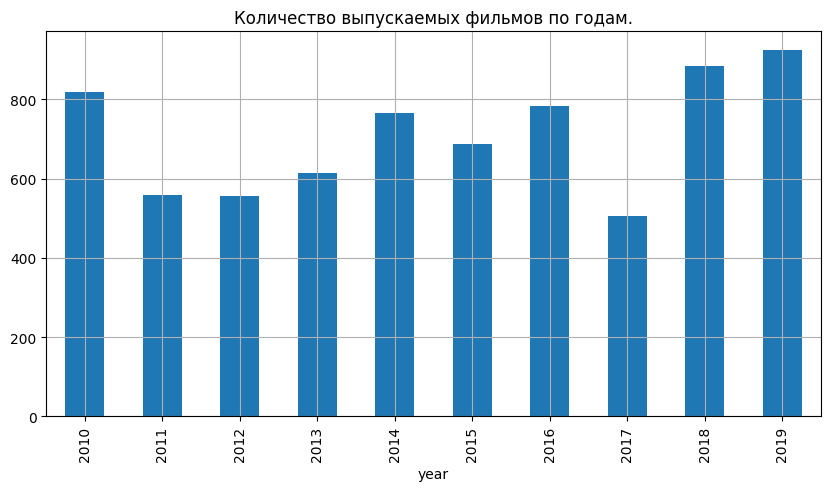

In [103]:
data_groupped.plot(y='unique', kind='bar', figsize=(10, 5), grid=True, legend=False,\
                   title='Количество выпускаемых фильмов по годам.');

#### **Как менялась динамика проката по годам?**

Сгруппируем суммарный доход от проката по годам.

In [104]:
data.groupby('year')['box_office'].sum()

year
2010        2.36
2011       14.04
2012        6.90
2013       29.68
2014     7444.82
2015    39497.25
2016    47866.34
2017    48563.73
2018    49668.39
2019    48425.75
Name: box_office, dtype: float64

Видим странную картину - ежегодные сборы за 2010-2014 годы намного меньше сборов в последуюшие годы.

Посмотрим, для какого количества фильмов у нас есть данные по сборам.

In [105]:
data.groupby('year')['box_office'].count()

year
2010     27
2011     45
2012     65
2013     77
2014    180
2015    443
2016    505
2017    357
2018    475
2019    529
Name: box_office, dtype: int64

До 2014 года у нас есть данные о кассовых сборах максимум только для 180 фильмов, хотя, как мы видели ранее, в это время в прокат выходило свыше 550 фильмов ежегдно. Недостаточно информации для достоверного анализа.

Только с 2015 года у нас есть достаточная информация по кассовым сборам для сопоставимого количества фильтов. Проанализируем данные о кассовых сборах с 2015 по 2019 год.

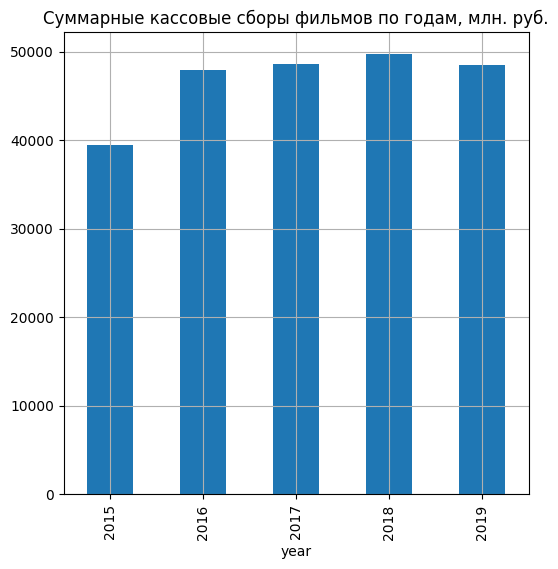

In [106]:
data[data['year'] >= 2015].groupby('year')['box_office'].sum().plot(kind='bar', figsize=(6, 6), grid=True,\
                                                title='Суммарные кассовые сборы фильмов по годам, млн. руб.');

В рассматриваемом периоде минимальная сумма кассовых сборов была в 2015 году - 39,5 млрд. руб. Далее величина кассовых сборов плавно увеличивалась, достигнув максомума в 2018 году - 49,7 млрд. руб.

#### **Среднее и медианное значения кассовых сборов - это сколько?**

Создаим сводную таблицу с нужными нам данными.

In [107]:
box_office_pivot = data[data['year'] >= 2015].pivot_table(values = 'box_office', index = 'year', aggfunc = ['mean', 'median'])
box_office_pivot

,mean,median
,box_office,box_office
year,,
2015,89.158578,6.14
2016,94.784832,4.64
2017,136.032857,9.97
2018,104.565032,8.89
2019,91.542060,4.65


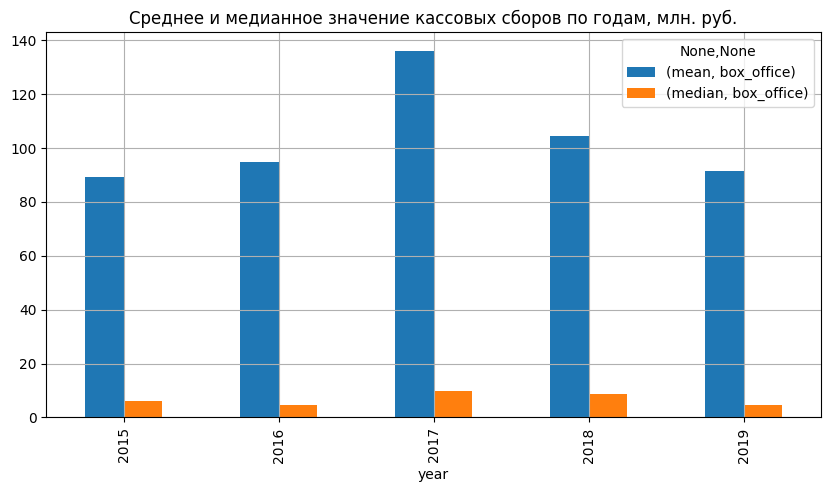

In [108]:
box_office_pivot.plot(kind='bar', figsize=(10, 5), grid=True,\
                      title='Среднее и медианное значение кассовых сборов по годам, млн. руб.');

Как мы видим, средняя величина кассовых сборов намного превышает медиану. Это говорит нам о том, что в каждом из рассматриваемых лет были фильмы, собравшие в прокате большую кассу.

Взглянем на фильмы, которые собрали более 2 млрд. руб.

In [109]:
data[(data['year'] >= 2015) & (data['box_office'] > 2000)][['title', 'year', 'ratings', 'genres', 'box_office']] \
.sort_values(by='box_office', ascending=False)

,title,year,ratings,genres,box_office
7454,Холоп,2019,6.8,комедия,3073.57
5651,Движение вверх,2017,7.5,спорт,2779.69
6818,Мстители: Финал,2019,7.6,фантастика,2576.61
6547,Т-34,2018,6.5,драма,2271.75
3487,Пираты Карибского моря: Мертвецы не рассказыва...,2017,6.6,фэнтези,2118.40
2858,Зверополис,2016,8.3,мультфильм,2048.13


#### **Влияет ли возрастное ограничение фильмов на их кассовые сборы?**

Сведем нужные нам данные в таблицу.

In [110]:
restriction_pivot = data[data['year'] >= 2015].pivot_table(values = 'box_office', \
                                                           index = ['age_restriction'], aggfunc = ['count', 'sum'])
restriction_pivot

,count,sum
,box_office,box_office
age_restriction,,
«0+» - для любой зрительской аудитории,83,809.04
«12+» - для детей старше 12 лет,340,60619.45
«16+» - для детей старше 16 лет,794,76034.75
«18+» - запрещено для детей,787,40759.61
«6+» - для детей старше 6 лет,305,55798.61


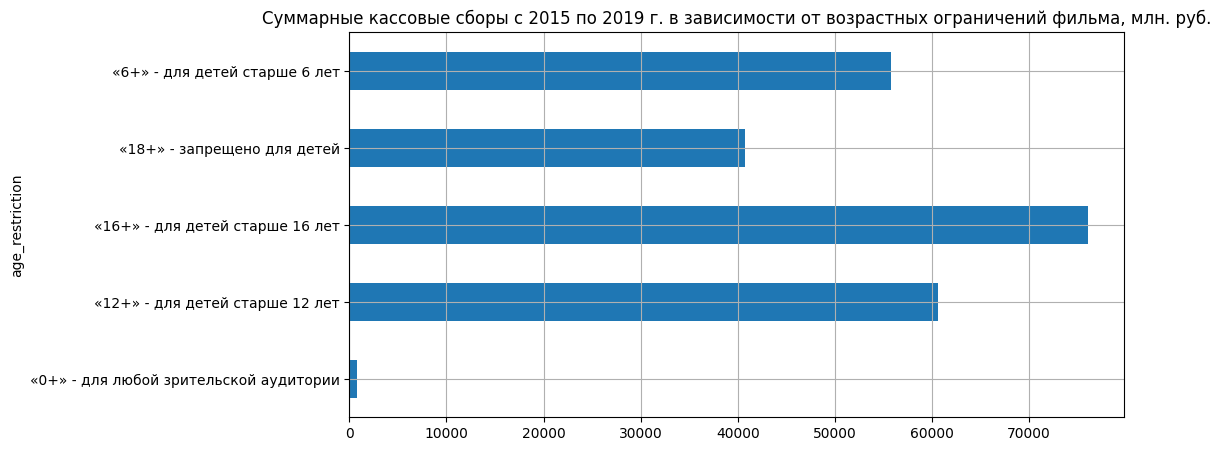

In [111]:
restriction_pivot.plot(y='sum', kind='barh', figsize=(10, 5), legend=False, grid=True, \
title='Суммарные кассовые сборы с 2015 по 2019 г. в зависимости от возрастных ограничений фильма, млн. руб.');

Мы обнаружили, что за 5 рассматриваемых лет наибольшее количество денег в прокате собрали фильмы с возрастным ограничением "16+" - 76 млрд. руб. Очевидно, на это влияет их количество. Суммарно их было выпущено 794 штуки.

Немного меньше (787 штук) было выпущено фильмов с категоричей "18+", но их суммарные сборы почти в два раза меньше - 40,8  млрд. руб.

Можем предположить, что возрастное ограничение сильно снизило количество купленных билетов - была осечена прослойка наиболее активных зрителей в возрасте от 16 до 18 лет. Это старшеклассники и учащиеся начальных курсов колледжей, которые, как известно, являются активными потребителями кинопродукции.

Фильмов с ограничениями "6+" и "12+" количественно вышло более чем в два меньше, чем "18+" (соответственно, 305 и 340 штук), но денег они собрали больше - соответственно, 55,8 и 60,6 млрд. руб.

Это можно объяснить тем, что это детские фильмы и на такие фильмы вместе с детьми ходят и взрослые. Т.е., увеличивается количество проданных билетов и, соответственно, увеличивается общая выручка.

Посмотрим на динамику доходов по годам.


In [112]:
restriction_year_pivot = data[data['year'] >= 2015].pivot_table(values = 'box_office', \
                                                                index = ['age_restriction', 'year'], aggfunc = 'mean')
restriction_year_pivot

box_office
age_restriction                        year            
«0+» - для любой зрительской аудитории 2015   10.830000
                                       2016    4.059189
                                       2017   76.533333
                                       2018    6.490000
                                       2019    5.916667
«12+» - для детей старше 12 лет        2015  203.224627
                                       2016  152.555750
                                       2017  191.498537
                                       2018  212.944925
                                       2019  149.178706
«16+» - для детей старше 16 лет        2015   70.609255
                                       2016   93.621348
                                       2017  154.917521
                                       2018  105.792436
                                       2019   71.648427
«18+» - запрещено для детей            2015   41.467863
                                       2016   46.217211
                                       2017   65.656599
                                       2018   48.938771
                                       2019   55.310546
«6+» - для детей старше 6 лет          2015  177.587143
                                       2016  191.320000
                                       2017  268.581111
                                       2018  148.602500
                                       2019  160.657000

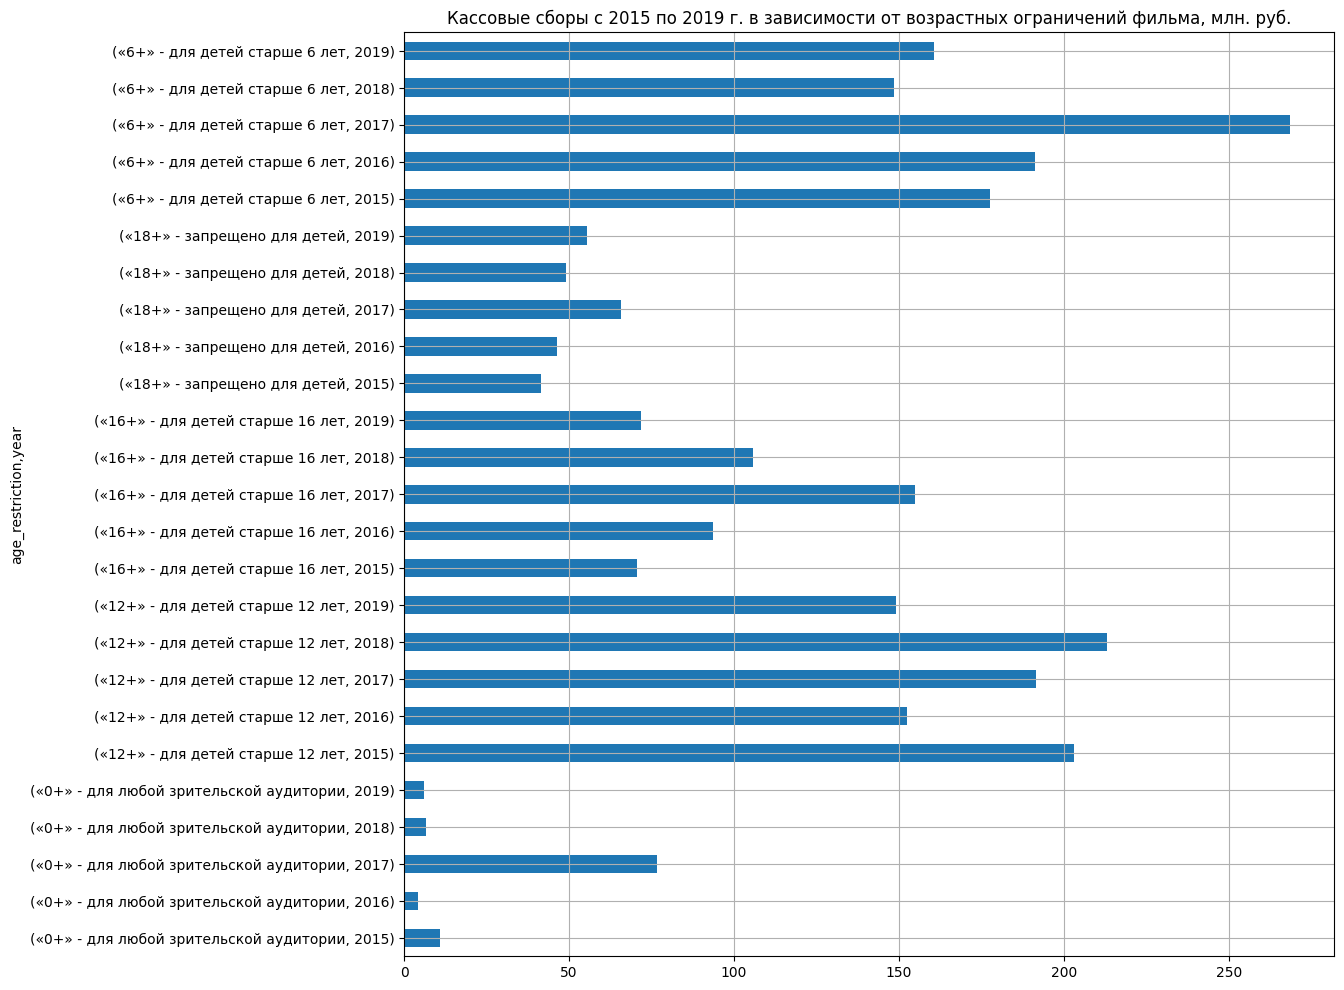

In [113]:
restriction_year_pivot.plot(kind='barh', figsize=(12, 12), grid=True, legend=False, \
title='Кассовые сборы с 2015 по 2019 г. в зависимости от возрастных ограничений фильма, млн. руб.');

Наиболее прибыльный год для кинотеатров бы 2017-й - мы видим пик доходов по всем категориям возрастных ограничений.

Также мы видим возрастающую динамику сборов для фильмов возрастной категории "18+".

В других категориях очевидной динамики не наблюдается.



### Рассмотрим фильмы, которые получили государственную поддержку


#### **Сколько у нас есть фильмов с господдержкой?**

Создадим новый датафрейм, в который соберем фильмы с государственной поддержкой. Добавим в него новую колонку `total_support`, в которой суммируем возвратную и невозвратную господдержку.

Также добавим колонку `efficiency`, которая представляется собой отношение кассовых сборов к бюджету фильма.


In [114]:
supported_films = data[data['refundable_support'].notna() | data['nonrefundable_support'].notna()]
supported_films['total_support'] = supported_films['refundable_support'] + supported_films['nonrefundable_support']

supported_films['efficiency'] = round(supported_films['box_office'] / supported_films['budget'], 2)
supported_films.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,total_support,efficiency
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,26.50,79.4,Министерство культуры,8.1,драма,0.37,2013,26.50,0.00
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,26.00,37.1,Министерство культуры,NaN,NaN,0.03,2014,26.00,0.00
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,Р.Давлетьяров,"Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,107.85,176.0,Фонд кино,5.3,комедия,19.96,2013,107.85,0.11
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,28.00,40.6,Министерство культуры,4.2,драма,0.06,2014,28.00,0.00
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,25.00,40.0,Министерство культуры,6.4,драма,0.23,2014,25.00,0.01


Оценим пропуски в колонке `budget`.

In [115]:
supported_films[supported_films['box_office'].isna()][['title', 'year', 'total_support', 'budget', 'box_office']].sort_values(by='budget', ascending=False)

,title,year,total_support,budget,box_office
7472,Вторжение,2019,500.00,944.0,NaN
7476,(Не)идеальный мужчина,2019,100.00,150.1,NaN
3148,Я-Учитель,2015,35.00,91.0,NaN
6966,Танец с саблями,2019,40.00,61.6,NaN
3336,Любовь и Сакс,2017,10.00,61.0,NaN
7007,Куратор,2019,25.00,60.7,NaN
7227,На Луне,2019,35.00,57.9,NaN
7342,Кроличья лапа,2019,30.00,47.7,NaN
6707,Мальчик русский,2019,30.00,46.9,NaN
7474,Я свободен,2019,30.00,46.2,NaN


Мы можем самостоятельно найти и заполнить пропущенные данные в кассовых сборах наиболее высокобюджетных фильмов - "Вторжение" и "(Не)идеальный мужчина".

На "Кинопоиске" есть данные по мировым сборам в долларах:
https://www.kinopoisk.ru/film/1045582/
https://www.kinopoisk.ru/film/1162847/

Оба фильма вышли в 2019 году, а средний курс доллара в этому году был 64,73 руб. Воспользуемся этим курсом для пересчета в рубли.

Остальные 14 строк с пропущенными данными по кассовым сборам удалим. Размер потреянных данных будет разумным - всего 4,2% (14 / 332).

In [116]:
supported_films.loc[7472, 'box_office'] = round(16653687 * 64.73 / 1000000, 2)
supported_films.loc[7476, 'box_office'] = round(7154649 * 64.73 / 1000000, 2)
supported_films = supported_films.dropna(subset=['box_office'])

In [117]:
print('В итоге у нас получился список из', supported_films.shape[0], 'фильмов с господдержкой')

В итоге у нас получился список из 318 фильмов с господдержкой


#### **Посчитаем основные количественные показатели.**

Посчитаем, сколько всего денег выделило государство в качестве поддержки фильмов за рассматриваемый период, посчитаем суммарный бюджет этих фильмов, а также оценим суммарный доход в прокате.

In [118]:
supported_films['total_support'].describe()

count    318.000000
mean      62.420314
std       73.917018
min        4.700000
25%       26.000000
50%       35.000000
75%       60.000000
max      500.000000
Name: total_support, dtype: float64

Как мы видим, в качестве господдержки выплачивались субсидии от 4,7 до 500 млн. руб.

Среднее значение - 62,4 млн. руб., медиана - 35 млн. руб.

In [119]:
total_support = supported_films['total_support'].sum()
print('Суммарно было субсидировано', round(total_support/1000, 1), 'млрд. руб.' )

Суммарно было субсидировано 19.8 млрд. руб.


In [120]:
total_budget =  supported_films['budget'].sum()
print('Суммарный бюджет субсидируемых фильмов:', round(total_budget/1000, 1), 'млрд. руб.' )

Суммарный бюджет субсидируемых фильмов: 43.8 млрд. руб.


In [121]:
total_box_office =  supported_films['box_office'].sum()
print('Суммарно было заработано', round(total_box_office/1000, 1), 'млрд. руб.' )

Суммарно было заработано 43.7 млрд. руб.


In [122]:
print('На прокате субсидируемых фильмов было заработано на', round((total_budget - total_box_office) / 1000, 1),\
      'млрд. руб. меньше их суммарного бюджета.' )

На прокате субсидируемых фильмов было заработано на 0.1 млрд. руб. меньше их суммарного бюджета.


Оценим фильмы по валовой прибыли, которая рассчитывается как "выручка" минус "себестоимость". Добавим в наш датафрейм колонку `gross_profit`, который будет представлять собой разность значений `box_office` - `budget`.

Посмотрим на 10 лучших и худших фильмов по этому показателю.

In [123]:
supported_films['gross_profit'] = round(supported_films['box_office'] - supported_films['budget'], 2)

In [124]:
top_gross_profit = supported_films.sort_values(by='gross_profit', ascending=False)[['title', 'year', 'total_support', 'budget', 'box_office', 'genres', 'ratings', 'gross_profit']].head(10)
top_gross_profit

,title,year,total_support,budget,box_office,genres,ratings,gross_profit
7454,Холоп,2019,60.0,160.00,3073.57,комедия,6.8,2913.57
5651,Движение вверх,2017,400.0,590.20,2779.69,спорт,7.5,2189.49
6547,Т-34,2018,180.0,563.80,2271.75,драма,6.5,1707.95
5503,Последний богатырь,2017,100.0,352.50,1655.04,комедия,6.8,1302.54
5706,Лёд,2018,85.0,148.60,1445.73,NaN,NaN,1297.13
2919,Экипаж .,2016,442.1,635.30,1402.26,драма,7.6,766.96
5639,Ёлки Новые,2017,100.0,174.40,855.45,комедия,5.8,681.05
3564,Притяжение (2016),2016,250.0,398.02,1038.32,фантастика,5.6,640.30
5657,Три богатыря и принцесса Египта,2017,50.0,174.50,759.23,мультфильм,5.5,584.73
2700,Самый Лучший День,2015,63.0,130.60,683.03,комедия,4.7,552.43


In [125]:
bottom_gross_profit = supported_films.sort_values(by='gross_profit', ascending=False)\
[['title', 'year', 'total_support', 'budget', 'box_office', 'genres', 'ratings', 'gross_profit']].tail(10)
bottom_gross_profit

,title,year,total_support,budget,box_office,genres,ratings,gross_profit
7462,Союз спасения,2019,500.0,980.0,717.70,история,6.0,-262.30
3350,Дуэлянт,2016,450.0,684.2,364.29,драма,6.6,-319.91
3041,Крякнутые каникулы,2015,40.0,399.1,69.69,мультфильм,5.4,-329.41
5912,Гурвинек. Волшебная игра,2018,60.0,385.0,30.33,мультфильм,3.5,-354.67
6697,Тобол,2019,130.0,499.8,138.16,история,5.8,-361.64
6885,Девятая,2019,300.0,453.7,55.88,детектив,5.8,-397.82
2141,Территория,2015,60.0,500.0,72.58,детектив,6.8,-427.42
5435,Матильда,2017,300.0,1032.9,511.78,фэнтези,7.7,-521.12
7169,Грех,2019,60.0,779.9,54.24,драма,6.9,-725.66
7112,Тайна Печати Дракона,2019,270.0,2305.1,333.60,приключения,5.8,-1971.50


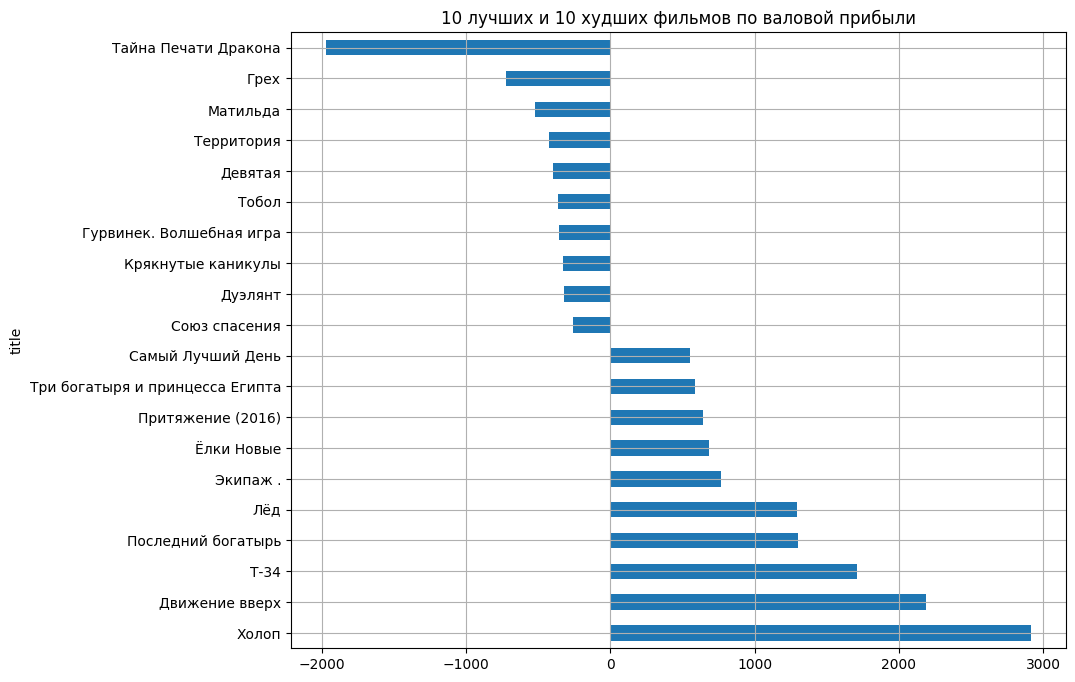

In [126]:
pd.concat([top_gross_profit, bottom_gross_profit], sort=False, axis=0)\
.plot(x='title', y='gross_profit', kind='barh', figsize=(10,8), grid=True, legend=False,\
title='10 лучших и 10 худших фильмов по валовой прибыли');

Как мы выяснили, лучший фильм по валовой прибыли - "Холоп" (2,9 млрд. руб.), худший - "Тайна Печати Дракона" (убыток 2 млрд. руб.)

#### **Cколько всего у нас прибыльных и убыточных фильмов?**

In [127]:
profitabe = len(supported_films.query('gross_profit > 0'))
unprofitabe = len(supported_films.query('gross_profit < 0'))

print('Количество окупившихся фильмов с господдержкой:', profitabe)
print('Количество неокупившихся фильмов с господдержкой:', unprofitabe)
print('Эффективность использования гос. средств:', round(profitabe / unprofitabe * 100, 1), '%')

Количество окупившихся фильмов с господдержкой: 75
Количество неокупившихся фильмов с господдержкой: 243
Эффективность использования гос. средств: 30.9 %



#### **Какие фильмы получили наибольшую господдержку?**

In [128]:
supported_films[supported_films['total_support'] == 500]\
[['title', 'year', 'total_support', 'budget', 'box_office', 'financing_source', 'genres', 'ratings']]

,title,year,total_support,budget,box_office,financing_source,genres,ratings
7462,Союз спасения,2019,500.0,980.0,717.70,Фонд кино,история,6.0
7472,Вторжение,2019,500.0,944.0,1077.99,Фонд кино,фантастика,5.7


Наибольшую господдержку - по 500 млн. руб. - получили два фильма, выпущенные в 2019 году. У обоих бюджет под миллиард рублей, оба получили довольно средние оценки, но фильм "Вторжение" окпился в прокате, а "Союз спасения" собрал меньше денег, чем было затрачено на его призводство.

#### **Фильмы каких режиссеров зарабатывают больше всех денег?**

Сгруппируем наш датасет по режиссерам и оценим их по показателю `efficiency`, который рассчитаем как отношение кассовых сборов к бюджету фильма. Он нам покажет насколько эффективно использовался бюджет фильма.

In [129]:
top_directors = supported_films.groupby('director')\
.agg({'title': ['count'], 'box_office': ['mean', 'sum'], 'budget': ['mean'], 'ratings': ['mean']})

top_directors.columns = ['films', 'box_office_mean', 'box_office_sum', 'budget_mean', 'avg_rating']
top_directors['box_office_mean'] = round(top_directors['box_office_mean'], 2)
top_directors['budget_mean'] = round(top_directors['budget_mean'], 2)
top_directors['avg_rating'] = round(top_directors['avg_rating'], 1)
top_directors['efficiency'] = round(top_directors['box_office_mean'] / top_directors['budget_mean'], 2)
top_directors.sort_values(by='efficiency', ascending=False).head(10)

,films,box_office_mean,box_office_sum,budget_mean,avg_rating,efficiency
director,,,,,,
О.Трофим,1,1445.73,1445.73,148.60,NaN,9.73
А.Черномазов (псевдоним Алексей Нужный),1,633.46,633.46,87.60,6.9,7.23
К.Шипенко,3,1275.92,3827.77,234.97,6.8,5.43
А.Першин (псевдоним Ж.Крыжовников),1,683.03,683.03,130.60,4.7,5.23
М.Бальчюнас,1,393.34,393.34,77.40,6.0,5.08
А.Мегердичев,1,2779.69,2779.69,590.20,7.5,4.71
К.Феоктистов,1,759.23,759.23,174.50,5.5,4.35
М.Бальчюнас (псевдоним Марюс Вайсберг),1,439.78,439.78,101.50,5.3,4.33
А.Сидоров,1,2271.75,2271.75,563.80,6.5,4.03


Фильм О. Трофима собрал в прокате почти в 10 раз больше, чем было затрачено на его производство. Посмтрим, что это за фильм.

In [130]:
data.query('director == "О.Трофим"')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year
5706,Лёд,111000518,2018-02-01 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия"", ...",Россия,О.Трофим,"М.Врубель, А.Андрющенко, Ф.Бондарчук, Д.Рудовс...",«12+» - для детей старше 12 лет,25.0,60.0,148.6,Фонд кино,NaN,NaN,1445.73,2018


Это фильм "Лед". Заполним пропуски с его жанром и рейтингом, которые возьмем с сайта "Кинопоиск".

In [131]:
supported_films.loc[5706, 'genres'] = 'мелодрама'
supported_films.loc[5706, 'ratings'] = 6.8

Теперь посмотрим, какие режиссеры заработали в количественном выражении больше всех из расчета на 1 фильм.

In [132]:
top_directors.sort_values(by='box_office_mean', ascending=False).head(10)

,films,box_office_mean,box_office_sum,budget_mean,avg_rating,efficiency
director,,,,,,
А.Мегердичев,1,2779.69,2779.69,590.20,7.5,4.71
А.Сидоров,1,2271.75,2271.75,563.80,6.5,4.03
О.Трофим,1,1445.73,1445.73,148.60,NaN,9.73
Н.Лебедев,1,1402.26,1402.26,635.30,7.6,2.21
К.Шипенко,3,1275.92,3827.77,234.97,6.8,5.43
Ф.Бондарчук,2,1058.16,2116.31,671.01,5.6,1.58
Д.Козловский,1,820.53,820.53,390.20,6.8,2.10
К.Феоктистов,1,759.23,759.23,174.50,5.5,4.35
А.Кравчук,1,717.70,717.70,980.00,6.0,0.73


In [133]:
data.query('director == "А.Мегердичев"')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year
1163,Метро_,111000413,2013-02-04 12:00:00+00:00,Художественный,"ООО ""Продюсерская фирма Игоря Толстунова""",Россия,А.Мегердичев,И.Толстунов,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.2,триллер,0.01,2013
4050,Темный мир._,111004910,2010-04-26 12:00:00+00:00,Художественный,"ООО Кинокомпания ""Шаман пикчерз""",Россия,А.Мегердичев,"Р.Дишдишян, А.Сидоров",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,4.4,фэнтези,NaN,2010
5651,Движение вверх,111011817,2017-12-21 12:00:00+00:00,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,А.Мегердичев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",«6+» - для детей старше 6 лет,0.0,400.0,590.2,Фонд кино,7.5,спорт,2779.69,2017


Режиссер А. Мегердичев снял фильм "Движение вверх", который при бюджете 590,2 млн. руб. заработал в прокате почти 2,8 млрд. руб.
Также в нашем датасете есть еще два его фильма, но мы их не рассматривали из-за пропущенных данных.



#### **Какие жанры лучше монетизируются?**

Применим аналогичные рассуждения для жанров и оценим результат.

In [134]:
top_genres = supported_films.groupby('genres')\
.agg({'title': ['count'], 'box_office': ['mean'], 'budget': ['mean'], 'ratings': ['mean']})

top_genres.columns = ['films', 'box_office_mean', 'budget_mean', 'avg_rating']
top_genres['box_office_mean'] = round(top_genres['box_office_mean'], 2)
top_genres['budget_mean'] = round(top_genres['budget_mean'], 2)
top_genres['avg_rating'] = round(top_genres['avg_rating'], 1)
top_genres['efficiency'] = round(top_genres['box_office_mean'] / top_genres['budget_mean'], 2)
top_genres.sort_values(by='efficiency', ascending=False)

,films,box_office_mean,budget_mean,avg_rating,efficiency
genres,,,,,
спорт,3,989.26,236.83,6.9,4.18
комедия,74,174.91,85.00,5.5,2.06
мелодрама,13,115.42,70.26,5.9,1.64
ужасы,10,71.01,56.39,5.2,1.26
фантастика,11,254.20,235.56,5.8,1.08
биография,3,172.29,176.33,6.9,0.98
семейный,6,97.40,100.65,5.0,0.97
мультфильм,30,187.40,203.69,5.8,0.92
драма,87,109.09,124.99,6.4,0.87


In [135]:
supported_films.query('genres == "спорт"')[['title', 'gross_profit', 'efficiency', 'ratings']]

,title,gross_profit,efficiency,ratings
3134,Чемпионы: Быстрее. Выше. Сильнее,78.39,1.87,7.0
3784,Эластико,-10.61,0.65,6.3
5651,Движение вверх,2189.49,4.71,7.5


In [136]:
supported_films.query('genres == "детский"')[['title', 'gross_profit', 'efficiency', 'ratings']]

,title,gross_profit,efficiency,ratings
2396,Небесный верблюд,-49.24,0.00,6.7
2535,Частное пионерское-2,-34.72,0.03,7.3
3428,Ура! Каникулы!,-52.32,0.04,7.3


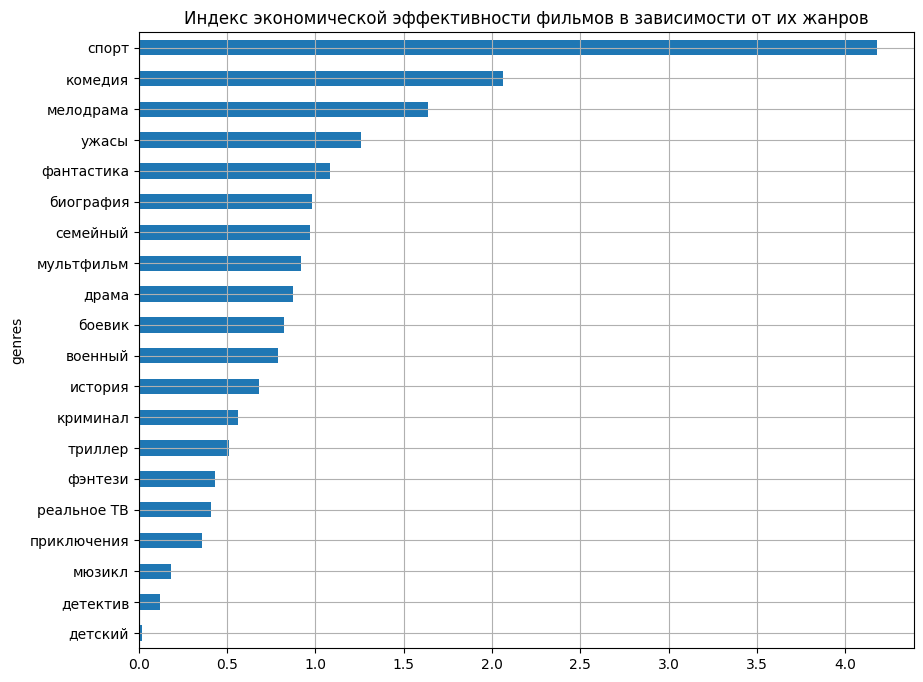

In [137]:
top_genres.sort_values(by='efficiency').plot(y='efficiency', kind='barh', figsize=(10,8), grid=True, legend=False,\
                        title='Индекс экономической эффективности фильмов в зависимости от их жанров');

Спортивные фильмы - лучшие по показателю эффективности и по средним сборам на один фильм. Но, как мы видим, это во многом за счет одного сверхуспешного фильма "Движение вверх".

Также прибыльные жарны - комедии, мелодрамы, ужасы.

Фантастика, биографии, семейные фильмы и мультфильмы - "около нуля".

In [138]:
top_genres.sort_values(by='box_office_mean', ascending=False)

,films,box_office_mean,budget_mean,avg_rating,efficiency
genres,,,,,
спорт,3,989.26,236.83,6.9,4.18
история,4,363.87,536.25,5.4,0.68
фантастика,11,254.20,235.56,5.8,1.08
приключения,6,200.93,552.80,5.8,0.36
мультфильм,30,187.40,203.69,5.8,0.92
комедия,74,174.91,85.00,5.5,2.06
биография,3,172.29,176.33,6.9,0.98
мелодрама,13,115.42,70.26,5.9,1.64
военный,9,113.07,142.88,6.5,0.79


Если посмотреть по средним кассовым сборам на один фильм, то и здесь спортивные фиьлмы - лучшие.

#### **Какие фильмы - лучшие...**
- **по эффективности затрат**

In [139]:
top_efficiency = supported_films.sort_values(by='efficiency', ascending=False)\
[['title', 'year', 'total_support', 'budget', 'box_office', 'genres', 'ratings', 'gross_profit', 'efficiency']].head(10)
top_efficiency

,title,year,total_support,budget,box_office,genres,ratings,gross_profit,efficiency
7454,Холоп,2019,60.00,160.0,3073.57,комедия,6.8,2913.57,19.21
5706,Лёд,2018,85.00,148.6,1445.73,мелодрама,6.8,1297.13,9.73
5747,Я худею,2018,30.00,87.6,633.46,комедия,6.9,545.86,7.23
3228,"Гуляй, Вася !",2016,25.34,39.0,259.10,комедия,6.5,220.10,6.64
2700,Самый Лучший День,2015,63.00,130.6,683.03,комедия,4.7,552.43,5.23
2204,8 новых свиданий,2014,30.00,77.4,393.34,комедия,6.0,315.94,5.08
5639,Ёлки Новые,2017,100.00,174.4,855.45,комедия,5.8,681.05,4.91
6176,Непрощенный,2018,40.00,82.5,393.28,драма,6.7,310.78,4.77
5651,Движение вверх,2017,400.00,590.2,2779.69,спорт,7.5,2189.49,4.71
5503,Последний богатырь,2017,100.00,352.5,1655.04,комедия,6.8,1302.54,4.70


Абсолютный чемпион по эффективности - фильм "Холоп". Он заработал почти в 20 раз больше своего бюджета.

Фильм "Лед" заработал почти в 10 раз больше, чем было затрачено на его производство.

На третьем месте - трогательная история, разыгранная Александрой Бортич на фоне потрясающих городских пейзажей Нижнего Новгорода. Фильм "Я худею" при относительно скромном бюджете в 87,6 млн. руб. заработал в прокате в 7 раз больше - 633,5 млн. руб.

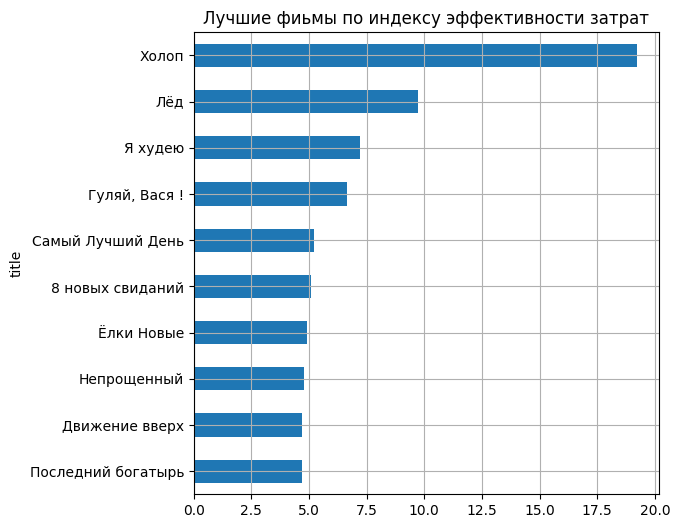

In [140]:
top_efficiency.sort_values(by='efficiency').plot(x='title', y='efficiency', kind='barh', figsize=(6, 6), grid=True,\
legend=False, title='Лучшие фиьмы по индексу эффективности затрат');

- **по валовой прибыли**

In [141]:
top_gross_profit = supported_films.sort_values(by='gross_profit', ascending=False)\
[['title', 'year', 'total_support', 'budget', 'box_office', 'genres', 'ratings', 'gross_profit', 'efficiency']].head(10)
top_gross_profit

,title,year,total_support,budget,box_office,genres,ratings,gross_profit,efficiency
7454,Холоп,2019,60.0,160.00,3073.57,комедия,6.8,2913.57,19.21
5651,Движение вверх,2017,400.0,590.20,2779.69,спорт,7.5,2189.49,4.71
6547,Т-34,2018,180.0,563.80,2271.75,драма,6.5,1707.95,4.03
5503,Последний богатырь,2017,100.0,352.50,1655.04,комедия,6.8,1302.54,4.70
5706,Лёд,2018,85.0,148.60,1445.73,мелодрама,6.8,1297.13,9.73
2919,Экипаж .,2016,442.1,635.30,1402.26,драма,7.6,766.96,2.21
5639,Ёлки Новые,2017,100.0,174.40,855.45,комедия,5.8,681.05,4.91
3564,Притяжение (2016),2016,250.0,398.02,1038.32,фантастика,5.6,640.30,2.61
5657,Три богатыря и принцесса Египта,2017,50.0,174.50,759.23,мультфильм,5.5,584.73,4.35
2700,Самый Лучший День,2015,63.0,130.60,683.03,комедия,4.7,552.43,5.23


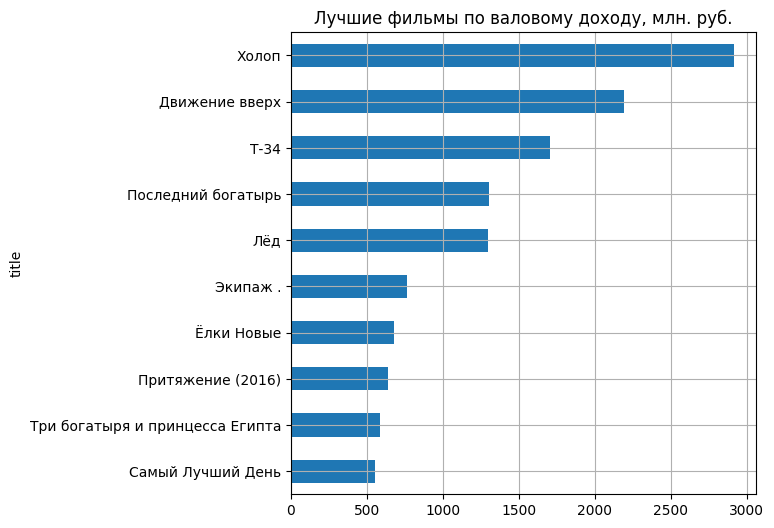

In [142]:
top_gross_profit.sort_values(by='gross_profit').plot(x='title', y='gross_profit', kind='barh', figsize=(6, 6), grid=True,\
legend=False, title='Лучшие фильмы по валовому доходу, млн. руб.');

И здесь первенство у фильма "Холоп", кассовые сборы которого превысили 3 млрд. руб.

Создатели фильма "Движение вверх" отлично потрудились "за себя и за Сашку" и заработали 2,78 млрд. руб.

"Т-34" замыкает тройку лидеров с не менее внушительными 2,27 млрд. руб.

- **по рейтингу**

In [143]:
top_ratings = supported_films.sort_values(by='ratings', ascending=False)\
[['title', 'year', 'total_support', 'budget', 'box_office', 'genres', 'ratings', 'gross_profit', 'efficiency']].head(10)
top_ratings

,title,year,total_support,budget,box_office,genres,ratings,gross_profit,efficiency
1869,А зори здесь тихие..._,2015,150.00,220.60,249.17,драма,8.5,28.57,1.13
3626,БОЛЬШОЙ,2016,210.00,320.00,228.58,криминал,8.5,-91.42,0.71
6853,Миллиард,2019,140.00,240.00,408.65,драма,8.2,168.65,1.70
1281,Пока еще жива,2013,26.50,79.40,0.37,драма,8.1,-79.03,0.00
3781,Мотылёк.,2017,37.35,63.20,0.41,драма,8.0,-62.79,0.01
2481,Однажды._,2015,97.00,156.40,12.75,драма,7.9,-143.65,0.08
7252,Герой,2019,120.00,250.00,172.87,фэнтези,7.9,-77.13,0.69
2471,Воин (2015),2015,80.00,127.37,196.57,боевик,7.8,69.20,1.54
7320,Успех,2019,25.00,75.00,3.18,драма,7.8,-71.82,0.04
3256,Рок,2017,40.00,59.90,0.48,криминал,7.8,-59.42,0.01


У первых пяти фильмов - оценка выше 8! Но в то же время три из них - убыточное. Это подозрительно. Перепроверим рейтинги трех первых фильмов на "Кинопоиске".

"А зори здесь тихие.." - рейтинг 7,0, а не 8,5. https://www.kinopoisk.ru/film/840754/

"Большой" - рейтинг 6,9, а не 8,5. https://www.kinopoisk.ru/film/841472/

"Миллиард" - рейтинг 4,9, а не 8,2. https://www.kinopoisk.ru/film/1097478/

Данные в колнке `ratings` - недостоверные. Мы не можем их использовать для анализа.

#### **Есть еще какие-нибудь взаимозависимости?**

In [144]:
corr = supported_films.corr()
corr

,pu_number,refundable_support,nonrefundable_support,budget,ratings,box_office,year,total_support,efficiency,gross_profit
pu_number,1.000000,0.238337,0.023103,0.122343,-0.082065,0.048526,0.043854,0.100761,0.032513,-0.021812
refundable_support,0.238337,1.000000,0.354466,0.655191,0.012195,0.334283,0.105048,0.635432,0.157652,-0.036758
nonrefundable_support,0.023103,0.354466,1.000000,0.629847,0.150946,0.475896,0.131136,0.947259,0.091207,0.130922
budget,0.122343,0.655191,0.629847,1.000000,0.106655,0.402064,0.180575,0.744661,0.085782,-0.172443
ratings,-0.082065,0.012195,0.150946,0.106655,1.000000,0.154101,0.054481,0.128774,0.084534,0.101089
box_office,0.048526,0.334283,0.475896,0.402064,0.154101,1.000000,0.131705,0.507549,0.785195,0.832562
year,0.043854,0.105048,0.131136,0.180575,0.054481,0.131705,1.000000,0.144291,0.105049,0.032443
total_support,0.100761,0.635432,0.947259,0.744661,0.128774,0.507549,0.144291,1.000000,0.131763,0.095515
efficiency,0.032513,0.157652,0.091207,0.085782,0.084534,0.785195,0.105049,0.131763,1.000000,0.784156
gross_profit,-0.021812,-0.036758,0.130922,-0.172443,0.101089,0.832562,0.032443,0.095515,0.784156,1.000000


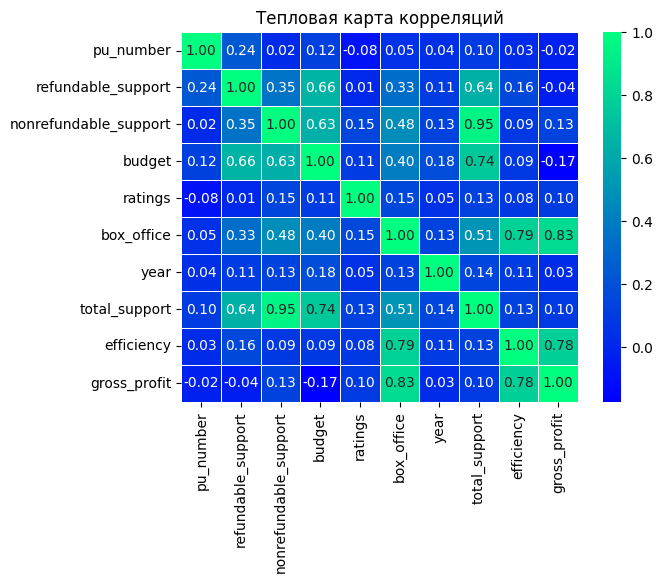

In [154]:
sns.heatmap(corr, cmap='winter', annot=True, fmt=".2f", linewidth=.5)
plt.title("Тепловая карта корреляций")
plt.show()

Мы видим уже известные нам корреляции между кассовыми сборами, эффективностью и валовым доходом. Других явных корреляций нет. Можем подчеркнуть, что господдержка и бюджет фильма не влияют ни на его эффективность, ни на валовую прибыль.

### Вывод

Мы получили два датафрейма с информацией о рынке российского кинопроката и для удобства анализа объединили их в один.
В объединенном датафрейме 7486 строк и 16 колонок.


**Провели предварительную обработку данных.**
- Изменили типы данных колонок `show_start_date` и `ratings`, переименовали колонку `puNumber` корректным образом.
- Для удобства визуального восприятия разделили колонки с финансовыми данными на миллион и округлили.
- Обнаружили 35 513 пропусков. Способ рассчитать достоверные данные для заполнения большинства из них мы не нашли.
- Избавились от неявных дубликатов - количество уникальных значений в колонке `production_country` с 950 до 802.
- Обнаружили дублирующиеся названий фильмов в колонке `title`, но у этих фильмов разные номера прокатных удостоверений.
- Избавились от аномалий в колонках с номерами прокатных удостоверений, режиссерами, типами фильмов и киностудиями.
- Добавили в датафрейм колонку с годом релиза фильма.
- Оптимизровали колонки с фамилиями режиссеров и жанрами фильмов - оставили только первые вхождения.

**Провели исследовательский анализ данных.**
- В период с 2010 по 2019 год максимальное количество фильмов было выпущено в 2019 году - 925 уникальных наименований, минимальное - в 2017 году - 505 уникальных наименований.
- Достаточная информация по кассовым сборам есть только начиная с 2015 года. Минимальные сборы зарегистрированы в 2015 году - 39,5 млрд. руб. Далее эта величина плавно увеличивалась, достигнув максимума в 2018 году - 49,7 млрд. руб.
- Наибольшее количество фильмов в рассматриваемом периоде вышло с возрастным ограничением "16+". Эта же категория получила максимальные кассовые сборы. Минимальное количество фильмов и минимальные сборы - у фильмов с категорией "0+".

Отдельно рассмотрели фильмы с гос. поддержкой. Для этого мы сформировали список из 318 фильмов, которые имели все необходимые для анализа данные.
- Средняя доля господдержки в бюджете фильма составляет 52%. Или 62.42 млн. руб. в абсолютном значении.
- Суммарно субсидировано 19.8 млрд. руб. за рассматриваемый период.
- Суммарный бюджет субсидируемых фильмов: 43.8 млрд. руб.
- Суммарные кассовые сборы этих фильмов: 43.7 млрд. руб.
- На прокате субсидируемых фильмов было заработано на 0.1 млрд. руб. меньше их суммарного бюджета.
- Оценили субсидируемые фильмы по их количеству:

    - Количество окупившихся фильмов: 75
    - Количество неокупившихся фильмов с господдержкой: 243
    - Эффективность использования гос. средств: 30.9 %

- Лучшие фильмы по валовой прибыли - "Холоп" (2,9 млрд. руб.), "Движение вверх" (2,2 млрд. руб., "Т-34" (1,7 млрд. руб.)
- Лучшие фильмы по эффективности затрат - "Холоп" (19,2%), "Лед" (9,7%), "Я худею" (7,2%)
- Лучшие фильмы по рейтингу - определить невозможно из-за некорректных значений рейтингов фильмов в предоставленных данных.
- Режиссер с максимальным средним бокс-офисом на фильм - А. Мегердичев (фильм "Движение вверх")
- Режиссер с лучшей эффективностью использования бюджета - О. Трофим (фильм "Лед")
- Лучшие жанры с максимальным средним бокс-офисом на фильм - "спорт",
- Лучшие жанры по эффективностьи использования бюджета - "спорт",
- Явной корреляции между размером господдержки фильма и его кассовыми сборами, валовой прибылью или эффективностью нет.



